# 多項式回帰をベイズでやってみる

In [2]:
# ライブラリ
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# 超パラメータ
lambda_ = 10 # 誤差の分散パラメータ 分散の逆数。λが大⇒観測の誤差が小さい
dim = 4 # 多項式の次元4なら3次関数で推定するということ

## ベイズ回帰の枠組み
+ モデルは、$y = w^t x + \epsilon$で確率モデルで書くと、$N(w^tx,\epsilon)$ (xは何か非線形変換されていることを想定。今回は多項式変換)
+ 事前分布$p(w)$は正規分布で与える。事前知識があればそれに従えばいいが、普通は平均:$m$=0ベクトルで共分散行列:$\Lambda$は単位行列を与える。
+ 事後分布p(w|x)は正規分布になり（共分散既知、平均未知のため）平均、共分散は以下で与えられる。
+ $\Lambda' =  \lambda\sum_n (x_n x_n^t) + \Lambda$
+ $m ' =  \Lambda'^-1 (\lambda \sum_n (y_n x_n) + \Lambda m)$
+ 予測分布p(y_*|x_*)は同様に正規分布となり、平均・共分散は以下で与えられる。
+ $m" = m'^t x_*$ 
+ $\lambda"^{-1} = \lambda^{-1}  + x_*^t\Lambda'x_*$

In [18]:
# データ生成
def bayesian_polynomial_regression(size, dim):
    # 事前分布
    m = np.zeros(dim)
    Lambda =np.eye(dim)
    w = np.random.multivariate_normal(m,Lambda, 1) # 事前分布は平均0ベクトル、共分散分散行列が単位行列の正規分布で与える。
    # 学習用のinput
    epsilon = np.random.normal(0, np.sqrt((1/lambda_)), size)
    x = np.random.uniform(0, 2*np.pi, size)
    print(x)
    x_stack = np.stack([np.ones(len(x))] + [np.power(x, i) for i in range(1, dim)])
    print(x_stack)
    y = np.sin(x) + epsilon
    print(y)
    # 事後分布のパラメータ（平均、共分散行列）
    Lambda_prime = np.zeros((dim, dim))
    mean_prime = np.zeros((dim, 1))
    for _x, _y in zip(x_stack, y):
        _x = _x.reshape((dim,1))
        Lambda_prime += np.dot(_x, _x.T)
        mean_prime += _y*_x
    Lambda_prime = Lambda_prime*lambda_ +Lambda
    Lambda_prime_inv = np.linalg.inv(Lambda_prime) # 逆行列
    mean_prime =(mean_prime*lambda_).flatten() + np.dot(Lambda, m)
    mean_prime = np.dot(Lambda_prime_inv, Lambda_prime)
    # 予測分布
    x_new = np.arange(0, 6.28, 0.01) #可視化用
    x_new_stack = np.vstack(np.array([np.ones(len(x_new))] + [np.power(x_new, i) for i in range(1, dim)]))
    m_star = np.dot(x_new_stack, mean_prime)
    lambda_star_inv = 1/lambda_ + np.array([_x.dot(Lambda_prime_inv).dot(_x) for _x in x_new_stack])
    return m_star, lambda_star_inv

[2.18589267 4.843565   2.48188609 5.17809566 1.90344764 0.80438425
 3.74982175 1.52089543 5.12428536 1.61951735 6.21973775 5.82207062
 2.9455916  5.98943799 1.21502242 0.51801362 3.51161939 2.06131276
 0.67275421 5.65017298]
[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]


ValueError: cannot reshape array of size 20 into shape (1,1)

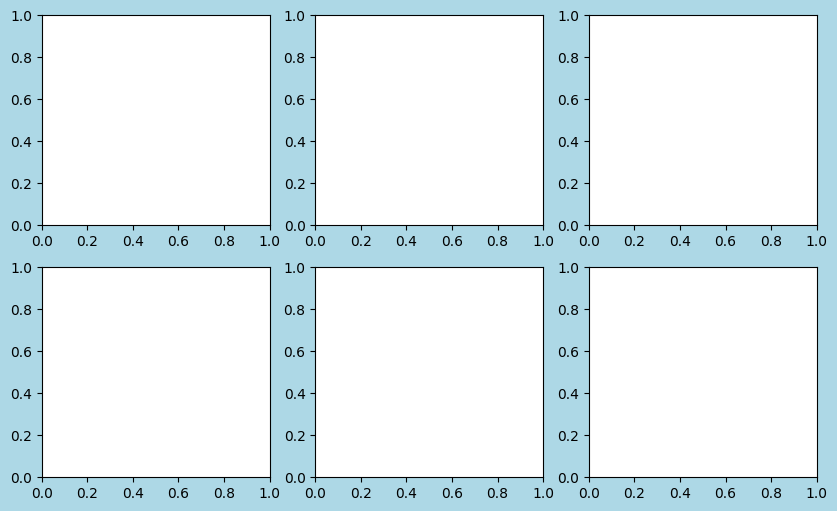

In [19]:
# 色々な次元でやってみる
fig = plt.figure(figsize = (10,6), facecolor='lightblue')
ax_list = [fig.add_subplot(2, 3, i+1) for i in range(6)]
x = np.arange(0, 6.28, 0.01)
for i, ax in zip(range(1, 7), ax_list):
    m_star, lambda_star_inv = bayesian_polynomial_regression(20, i)
    ax.plot(x, m_star) # 予測の期待値
    ax.plot(x, m_star + np.sqrt(lambda_star_inv), linestyle='--') # 予測の期待値 + 標準偏差
    ax.plot(x, m_star - np.sqrt(lambda_star_inv), linestyle='--') # 予測の期待値 - 標準偏差
    ax.set_xlim(0, 2*np.pi)
    ax.set_ylim(-2, 2)
    ax.set_title(f'dim={i}')
    

In [17]:
x = [1,2, 3]
x_stack = np.stack([np.ones(3)] + [np.power(x, i) for i in range(1, dim)])
x_stack

array([[ 1.,  1.,  1.],
       [ 1.,  2.,  3.],
       [ 1.,  4.,  9.],
       [ 1.,  8., 27.]])